# Search Algorithm Timing Analysis

This project compares the performance multiple search algorithms **linear search**, **binary search**, and **exponential search**; across lists of different sizes. The purpose is to observe how the execution time of each algorithm scales as the size of the input list increases.

The program:
- Implements both linear and binary search functions.
- Runs timing experiments using the `timeit` module for lists of sizes `10³`, `10⁶`, `10⁹`, and `10¹²`.
- Calculates the **minimum**, **maximum**, and **average** runtimes for each search algorithm.
- Outputs the results in both the terminal and a formatted `.csv` file for external viewing.



## Imports and File Overview

This cell contains metadata and the necessary imports for the program. The script uses `timeit` to measure performance, `random` to generate list elements, and `typing.List` to indicate type hints. 


In [90]:
#============================================================================
# INPUT: No input. List is preset. 

# OUTPUT: CSV file containing timing results.

# Credits: I used ChatGPT to help me format the output of the CSV file and terminal. I also used it to help me write 
# the run experiments function.

# Date Last Modified:
#  (jayline febles) 02/04/2025
#  (jayilne febles) 05/03/2025
#============================================================================

import timeit
import random
import os
from typing import List

## Linear Search Function

This cell defines the `linearSearch` function, which performs a simple linear search through a list. It returns `True` if the target is found and `False` otherwise.


In [91]:
# Search algorithms
def linearSearch(lst: List[int], target: int) -> bool:
    """Performs linear search for target in lst."""
    for i in lst:
        if i == target:
            return True
    return False


## Binary Search Function

This cell defines the `binarySearch` function, which assumes the input list is sorted. It uses a divide-and-conquer approach to locate the target value more efficiently than linear search.


In [92]:
def binarySearch(lst: List[int], target: int) -> bool:
    """Performs binary search for target in lst (assumes lst is sorted)."""
    left, right = 0, len(lst) - 1
    while left <= right:
        mid = (left + right) // 2
        if lst[mid] == target:
            return True
        elif lst[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False

## Exponential Search Function (Added)

This cell defines the `exponentialSearch` function, which is a fast search algorithm for sorted lists. It works by first finding a range where the target might exist by exponentially increasing the index, and then performing binary search within that range. This approach is especially useful when the size of the list is large or unknown.


In [93]:
def exponentialSearch(lst: List[int], target: int) -> bool:
    """Performs exponential search for target in lst (assumes lst is sorted)."""
    if not lst:
        return False
    if lst[0] == target:
        return True

    index = 1
    while index < len(lst) and lst[index] <= target:
        index *= 2

    # Binary search in the bounded range
    left = index // 2
    right = min(index, len(lst) - 1)

    while left <= right:
        mid = (left + right) // 2
        if lst[mid] == target:
            return True
        elif lst[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return False


## Updated Run Experiments with Exponential Search

This updated version of `runExperiments()` includes a third algorithm: **Exponential Search**. For each list size, the function now performs timing trials for linear, binary, and exponential search. It calculates the minimum, maximum, and average time (in seconds) for each algorithm over 10 repetitions and stores the results in a single list.


In [101]:
def runExperiments(sizes: List[int]) -> List[List[float]]:
    """Runs timing experiments on linear, binary, and exponential search; computes min, max, avg times."""
    results: List[List[float]] = []

    for size in sizes:
        # Cap list generation for practicality
        lst: List[int] = sorted(random.sample(range(min(size * 10, 10**6)), min(size, 10**6)))
        target: int = random.choice(lst)

        linearTimes = [timeit.timeit(lambda: linearSearch(lst, target), number=1) for _ in range(10)]
        binaryTimes = [timeit.timeit(lambda: binarySearch(lst, target), number=10) for _ in range(10)]
        exponentialTimes = [timeit.timeit(lambda: exponentialSearch(lst, target), number=10) for _ in range(10)]

        # Linear stats
        linearMin = min(linearTimes)
        linearMax = max(linearTimes)
        linearAvg = sum(linearTimes) / len(linearTimes)

        # Binary stats
        binaryMin = min(binaryTimes)
        binaryMax = max(binaryTimes)
        binaryAvg = sum(binaryTimes) / len(binaryTimes)

        # Exponential stats
        exponentialMin = min(exponentialTimes)
        exponentialMax = max(exponentialTimes)
        exponentialAvg = sum(exponentialTimes) / len(exponentialTimes)

        # Append results
        results.append([
            size,
            linearMin, linearMax, linearAvg,
            binaryMin, binaryMax, binaryAvg,
            exponentialMin, exponentialMax, exponentialAvg
        ])

    return results


## Updated CSV Output for Three Algorithms

This updated CSV writer function now includes timing results for exponential search, alongside linear and binary. The format is consistent with the original output style, using spaced columns and labeled rows.



In [95]:
def CSVfile(results: List[List[int]]):
    """Saves search timing results to a CSV file."""
    CSV = open("searchTimes.csv", "w")
    
    CSV.write("Search Algorithm Runtime Report\n")
    CSV.write("-----------------------------------\n")
    CSV.write("This report compares the execution times of linear and binary search across different list sizes. It also includes the MIN, MAX, and AVG. \n\n")
    CSV.write("Results (times in seconds):\n")
    CSV.write("List Size, Linear Min, Linear Max, Linear Avg, Binary Min, Binary Max, Binary Avg\n")
    CSV.write("-------------------------------------------------------------------------------------------\n")

    for row in results:
        CSV.write(f"{row[0]:<13} {row[1]:.6f} {row[2]:.6f} {row[3]:.6f} {row[4]:.6f} {row[5]:.6f} {row[6]:.6f}\n")


    # Close the file
    CSV.close()


## Plotting Min and Max Runtimes

This second visualization compares the minimum and maximum runtimes for each search algorithm. It helps evaluate not just performance speed but also the variability in timing, which is important for understanding real-world consistency.


In [96]:
def plotMinMaxTimes(results: List[List[float]]) -> None:
    """Plots min and max runtimes for each search algorithm across all list sizes."""
    import numpy as np

    sizes = [str(row[0]) for row in results]
    x = np.arange(len(sizes))
    width = 0.2

    linear_min = [row[1] for row in results]
    linear_max = [row[2] for row in results]

    binary_min = [row[4] for row in results]
    binary_max = [row[5] for row in results]

    exponential_min = [row[7] for row in results]
    exponential_max = [row[8] for row in results]

    fig, ax = plt.subplots(figsize=(10, 6))

    # Linear Search
    ax.bar(x - width, linear_min, width, label='Linear Min', color='royalblue')
    ax.bar(x - width, linear_max, width, bottom=0, alpha=0.5, label='Linear Max', color='lightskyblue')

    # Binary Search
    ax.bar(x, binary_min, width, label='Binary Min', color='forestgreen')
    ax.bar(x, binary_max, width, bottom=0, alpha=0.5, label='Binary Max', color='lightgreen')

    # Exponential Search
    ax.bar(x + width, exponential_min, width, label='Exponential Min', color='darkorange')
    ax.bar(x + width, exponential_max, width, bottom=0, alpha=0.5, label='Exponential Max', color='gold')

    ax.set_ylabel('Time (seconds)')
    ax.set_yscale('log')
    ax.set_title('Min and Max Runtimes per Algorithm (Log Scale)')
    ax.set_xticks(x)
    ax.set_xticklabels(sizes)
    ax.set_xlabel('List Size')
    ax.legend()
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


## Plotting Average Search Times

This function uses `matplotlib` to plot the average runtime for each search algorithm across the tested list sizes. Both axes use a logarithmic scale to better visualize performance differences at large input sizes.


In [97]:
import matplotlib.pyplot as plt

def plotSearchTimes(results: List[List[float]]) -> None:
    """Plots average runtime for each search algorithm across list sizes."""
    sizes = [row[0] for row in results]
    linear_avg = [row[3] for row in results]
    binary_avg = [row[6] for row in results]
    exponential_avg = [row[9] for row in results]

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, linear_avg, marker='o', label='Linear Search')
    plt.plot(sizes, binary_avg, marker='s', label='Binary Search')
    plt.plot(sizes, exponential_avg, marker='^', label='Exponential Search')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('List Size (log scale)')
    plt.ylabel('Average Time (seconds, log scale)')
    plt.title('Average Runtime of Search Algorithms')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


## Updated Main Function with Exponential Search Output

This updated `main()` function now prints timing results for **three search algorithms**: linear, binary, and exponential. It formats and displays the results in a table and saves them to the `.csv` file.


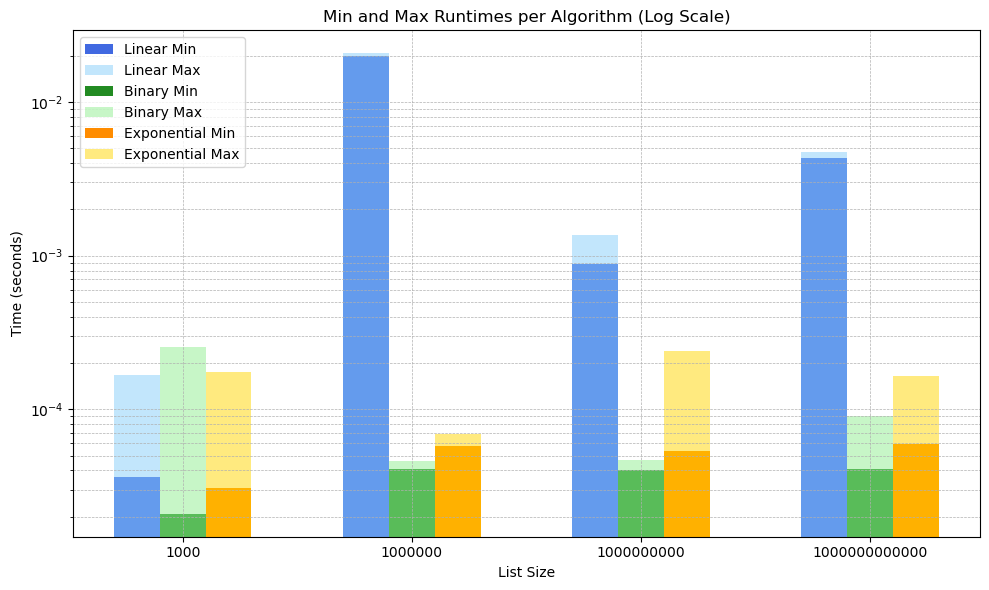

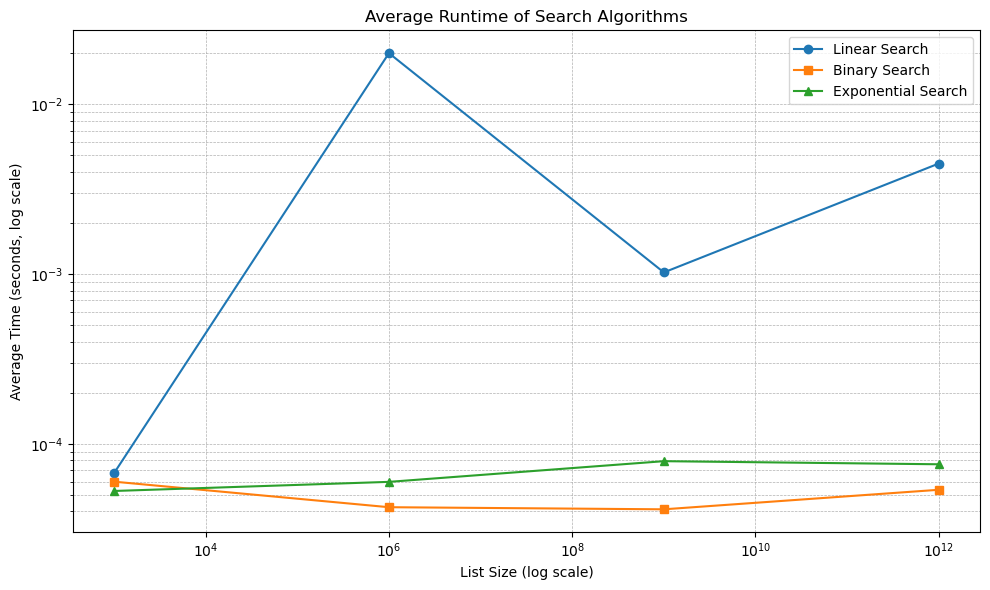

Results (times in seconds):

List Size     Lin Min    Lin Max    Lin Avg    Bin Min    Bin Max    Bin Avg    Exp Min    Exp Max    Exp Avg   
--------------------------------------------------------------------------------------------------------------
1000          0.000036   0.000168   0.000067   0.000021   0.000253   0.000060   0.000031   0.000174   0.000053  
1000000       0.019811   0.020741   0.019998   0.000041   0.000046   0.000042   0.000058   0.000069   0.000060  
1000000000    0.000882   0.001353   0.001022   0.000040   0.000047   0.000041   0.000054   0.000241   0.000079  
1000000000000 0.004336   0.004709   0.004476   0.000041   0.000091   0.000054   0.000059   0.000164   0.000076  


In [102]:
def main():
    """Main function to execute the experiment."""
    sizes = [10**3, 10**6, 10**9, 10**12]
    results = runExperiments(sizes)

    plotMinMaxTimes(results)
    plotSearchTimes(results)

    print("Results (times in seconds):\n")
    print("{:<13} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
        "List Size", "Lin Min", "Lin Max", "Lin Avg",
        "Bin Min", "Bin Max", "Bin Avg",
        "Exp Min", "Exp Max", "Exp Avg"
    ))
    print("-" * 110)

    for row in results:
        print("{:<13} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f} {:<10.6f}".format(
            row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8], row[9]
        ))

    CSVfile(results)


# Run the script only if executed directly
if __name__ == "__main__":
    main()

